# Insurance medical expenses prediction
**Life cycle of Machine learning Project**

* Understanding the Problem Statement
* Data Collection
* Exploratory data analysis
* Data Cleaning
* Data Pre-Processing
* Model Training 
* Choose best model

### About
The aim is to accurately estimate the medical expenses using patient demographic details such as age, gender, region, etc. The insurance companies can then estimate the correct premium amount based on the expented medical expenses.

## 1) Problem statement.

The cost of insurance set by the insurance companies is often done by using traditional methods which may not be accurate and heavily depending on the manual efforts (when a new parameter is introduced frequently). By adopting Machine Learning approach the model can quickly and efficiently learn the impact of predictor features on the medical expenses without much manual intervention.

**In this project we are going to use the data given to build a Regression model:**

* This model is to predict the future medical expenses based on the given dataset.
* This can be used to set a correct premium amount for a new health insurance policy .

## 2) Data Collection.
* The Dataset is part of Office of Machine Learning course website (Spring 2017) from Professor Eric Suess
* The data consists of 1338 Rows and 7 Columns

https://www.kaggle.com/datasets/noordeen/insurance-premium-prediction

### 2.1 Import Data and Required Packages

**Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

**Import the CSV Data as Pandas DataFrame**

In [4]:
df = pd.read_csv(r"insurance.csv")

**Show Top 5 Records**

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


**Shape of the dataset**

In [6]:
df.shape

(1338, 7)

**Summary of the dataset**

In [7]:
# Display summary statistics for a dataframe
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


**Check Datatypes in the dataset**

In [8]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## 3. EXPLORING DATA

In [9]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 4 numerical features : ['age', 'bmi', 'children', 'expenses']

We have 3 categorical features : ['sex', 'smoker', 'region']


In [10]:
# proportion of count data on categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

male      50.523169
female    49.476831
Name: sex, dtype: float64
---------------------------
no     79.521674
yes    20.478326
Name: smoker, dtype: float64
---------------------------
southeast    27.204783
southwest    24.289985
northwest    24.289985
northeast    24.215247
Name: region, dtype: float64
---------------------------


**Insights**
 - `Gender` Alomst same proportion of male and female
 - `Smoker` Smoker and non-smoker is not uniformly distributed.
 - `Region` Data uniformly distrbuted across all the four regions.

## Univariate Analysis

* The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

Other Type of Analysis are
* **Bivariate Analysis:** The analysis of two variables.
* **Multivariate Analysis:** The analysis of two or more variables.

### Numerical Features

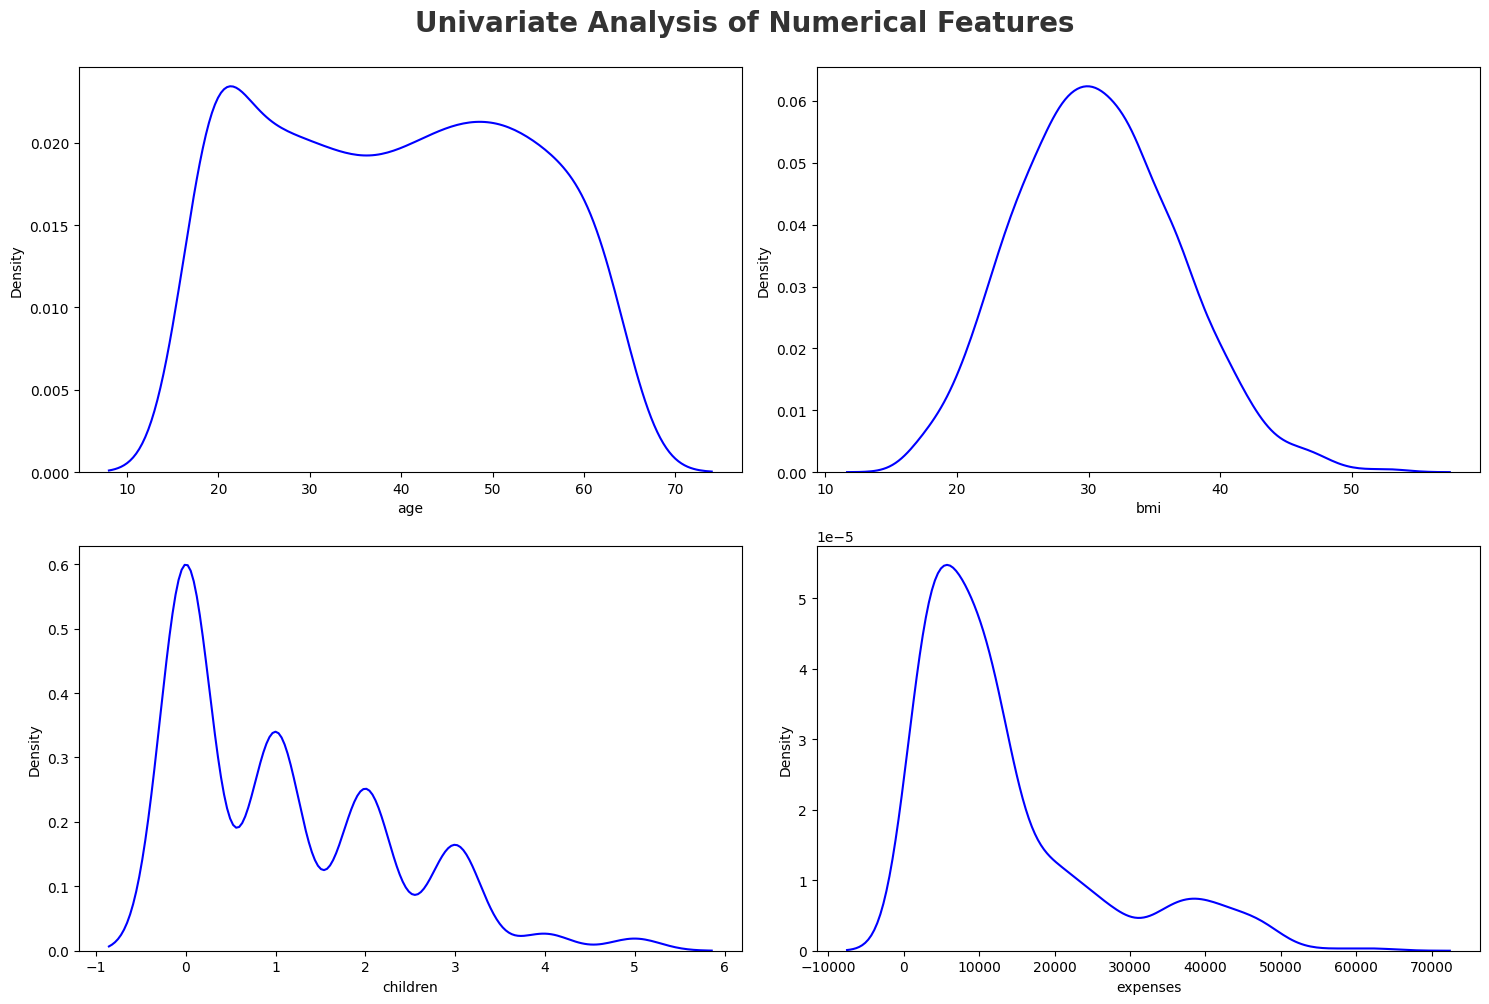

In [11]:
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x=df[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()
    
# save plot
# plt.savefig('./images/Univariate_Num.png')

**Insights**
 - `age` age column has Kurtosis - Platykurtic.
 - `bmi` is normally distributed.
 - `children` is discrete numerical variable.
 - `expenses` is right/positive skewed distribution

### Categorical Features

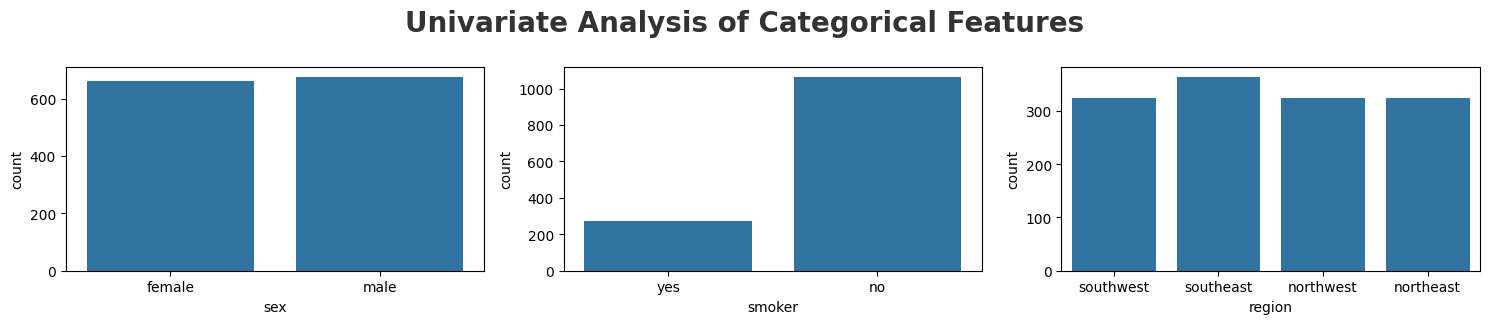

In [12]:
# categorical columns
plt.figure(figsize=(15, 8))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(categorical_features)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.tight_layout()
    
# save plot
# plt.savefig('./images/Univariate_Cat.png')

**Insights**
 - `smoker` coulmn havs signle category (no) dominating.
 - Other two columns are balanced.

### Multivariate Analysis

* Multivariate analysis is the analysis of more than one variable.

In [13]:
discrete_features=[feature for feature in numeric_features if len(df[feature].unique())<=25]

continuous_features=[feature for feature in numeric_features if len(df[feature].unique()) > 25]

print('We have {} discrete features : {}'.format(len(discrete_features), discrete_features))
print('\nWe have {} continuous_features : {}'.format(len(continuous_features), continuous_features))

We have 1 discrete features : ['children']

We have 3 continuous_features : ['age', 'bmi', 'expenses']


### Check Multicollinearity in Numerical features

In [14]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [30]:
df[categorical_features]

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


**Insights**
 - There is no multicollinearity between any variables, 

### Check Multicollinearity for Categorical features

* **A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test**

* **A chi-square statistic is one way to show a relationship between two categorical variables.**

* **Here we test correlation of Categorical columns with Target column i.e case_status**

Null Hypothesis ($ H_0 $): The Feature is independent of target column (No-Correlation)

Alternative Hypothesis ($ H_1 $): The Feature and Target column are not independent (Correalted)

In [37]:
from scipy.stats import chi2_contingency
from itertools import product
chi2_test = []
feature1 = []
feature2 = []
feat_combinations = list(product(categorical_features, categorical_features))
for feature in feat_combinations:
    
    if feature[0] != feature[1]:
        tab = pd.crosstab(df[feature[0]], df[feature[1]])
        feature1.append(feature[0])
        feature2.append(feature[1])
        if chi2_contingency(tab)[1] < 0.05:
            chi2_test.append('Reject Null Hypothesis')
        else:
            chi2_test.append('Fail to Reject Null Hypothesis') 

result = pd.DataFrame(data=[feature1, feature2, chi2_test]).T
result.columns = ['Feature1', 'Feature2', 'Hypothesis Result']
result   

,Feature1,Feature2,Hypothesis Result
0,sex,smoker,Reject Null Hypothesis
1,sex,region,Fail to Reject Null Hypothesis
2,smoker,sex,Reject Null Hypothesis
3,smoker,region,Fail to Reject Null Hypothesis
4,region,sex,Fail to Reject Null Hypothesis
5,region,smoker,Fail to Reject Null Hypothesis


**Report** 
* Here `sex` and `smoker` feature combination fails to Reject Null Hypothesis which means these two features are correlated with each other. 
* Hence we need to remove one of them that we will decide by checking how these features are correlated with the target variable
* Then we can remove the feature that is least correlated with the target variable

**Now lets check how these categorical features are correlated with the target variable**

In [39]:
from scipy.stats import chi2_contingency
chi2_test = []
p_val = []
for feature in categorical_features:
    p_value = chi2_contingency(pd.crosstab(df['expenses'], df[feature]))[1] 
    if  p_value < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
    p_val.append(p_value)
result = pd.DataFrame(data=[categorical_features, chi2_test, p_val]).T
result.columns = ['Column', 'Hypothesis Result', 'p-value']
result

,Column,Hypothesis Result,p-value
0,sex,Fail to Reject Null Hypothesis,0.479437
1,smoker,Fail to Reject Null Hypothesis,0.479437
2,region,Fail to Reject Null Hypothesis,0.470335


**Report** 
* Here all features have p-values closer to the threshold value hence we can say they are co-rrelated with the target, and between sex and smoker we can remove any feature since 
* they are correlated with the same degree with the target, we can remove sex since the avg expenses is almost same for them.

### Checking Null Values

In [40]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [41]:
continues_features=[feature for feature in numeric_features if len(df[feature].unique())>=10]
print('Num of continues features :',continues_features)

Num of continues features : ['age', 'bmi', 'expenses']


## 4. Visualization

### 4.1 Distribution of expenses between Males and Females

In [44]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


Text(0, 0.5, 'Expenses')

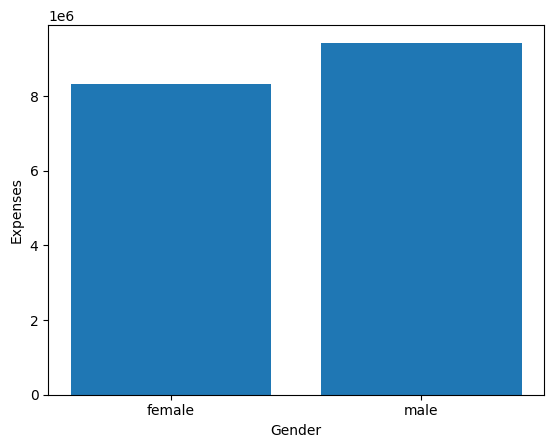

In [58]:
import matplotlib
gender_distribution = df.groupby('sex')['expenses'].sum()
plt.bar(gender_distribution.index, gender_distribution.values)
plt.xlabel('Gender')
plt.ylabel('Expenses')

**Report:**
* Expenses for males are slinghtly more than female population

### Distribution of expenses across different ages

<Axes: xlabel='age', ylabel='expenses'>

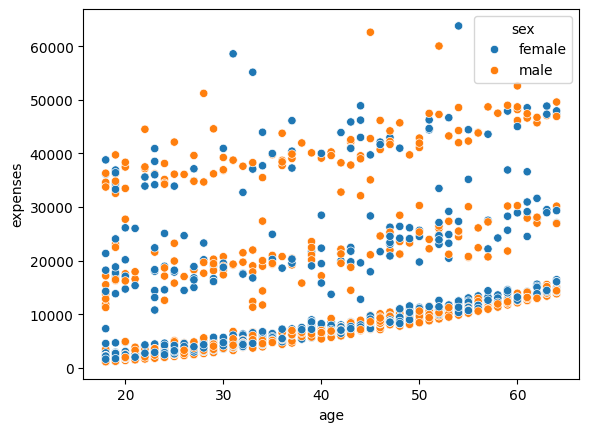

In [73]:
import seaborn as sns
sns.scatterplot(data=df, x="age", y="expenses", hue='sex')

**Report:**
* Though the relation is not clearly linear, there is a correlation, as we can see the expenses increased with age

In [67]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


### Relation between BMI and expenses

<Axes: xlabel='bmi', ylabel='expenses'>

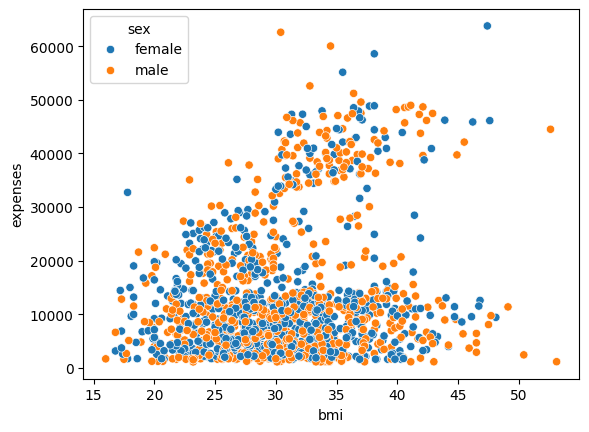

In [72]:
import seaborn as sns
sns.scatterplot(data=df, x="bmi", y="expenses", hue='sex')


**Report:**
* People with BMI between 30 and above have more expenses, have greater chances of incurring expenses

### Relation between Children and expenses

<Axes: xlabel='children', ylabel='expenses'>

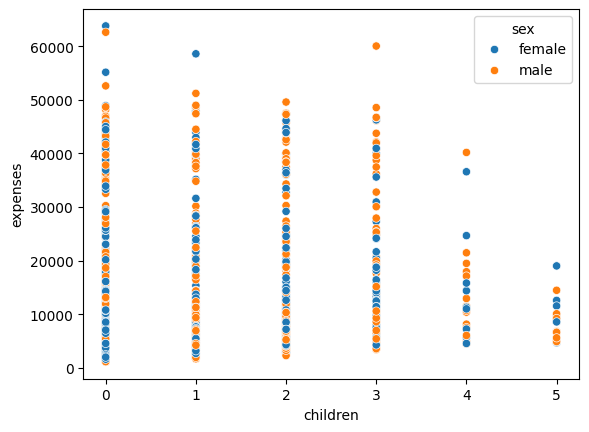

In [74]:
import seaborn as sns
sns.scatterplot(data=df, x="children", y="expenses", hue='sex')

**Report:**
* People with more children have less expenses

### Relation between Smoker and expenses

<Axes: xlabel='smoker', ylabel='expenses'>

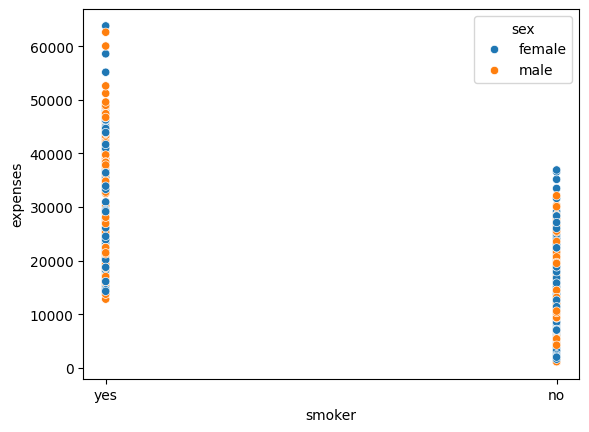

In [75]:
import seaborn as sns
sns.scatterplot(data=df, x="smoker", y="expenses", hue='sex')

**Report:**
* Clearly smokers incur more expenses than non smokers

### Relation between Region and expenses

<Axes: xlabel='region', ylabel='expenses'>

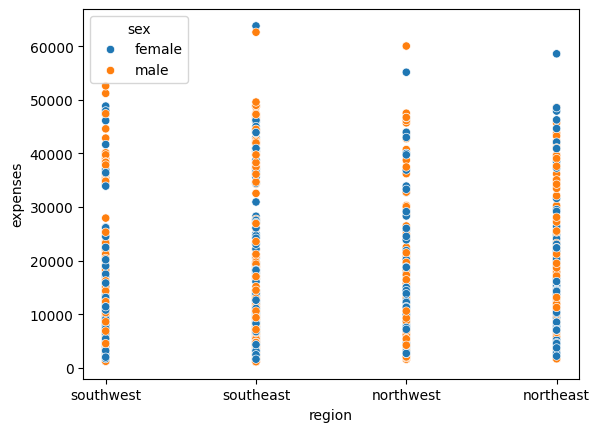

In [76]:
import seaborn as sns
sns.scatterplot(data=df, x="region", y="expenses", hue='sex')

**Report:**
* People from the Northern regions have relatively lower health care expenses than the Southern regions

### Final Report 
* Between `sex` and `smoker` one of the column can be removed as they are correlated with each other. Removing the `sex` column is preferable as it has no effect on the target
* Target column `expenses` has outliers and skewed, this needs to be handled.

In [46]:
########################-------------Feature Engineering and Model Training in Next ipynb------------###########################